In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news/train.csv')

#Get shape and head
df.shape
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
conversion_dict = {0: 'Real', 1: 'Fake'}
df['label'] = df['label'].replace(conversion_dict)
df.label.value_counts()

Fake    10413
Real    10387
Name: label, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['label'], test_size=0.25, random_state=7, shuffle=True)
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)

In [ ]:
vec_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U'))
vec_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

In [ ]:
pac=PassiveAggressiveClassifier()
pac.fit(vec_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pac.predict(vec_test)
score=accuracy_score(y_test,y_pred)
print(f'PAC Accuracy: {round(score*100,2)}%')

PAC Accuracy: 96.12%


In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred, labels=['Real','Fake'])
cnf_matrix

array([[2485,  101],
       [ 101, 2513]])

Text(0.5, 15.0, 'Actual')

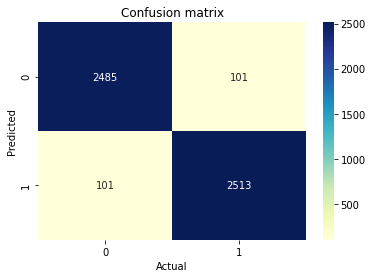

In [ ]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
#ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted')
plt.xlabel('Actual')

In [ ]:
X=tfidf_vectorizer.transform(df['text'].values.astype('U'))

In [ ]:
scores = cross_val_score(pac, X, df['label'].values, cv=5)
print(f'K Fold Accuracy: {round(scores.mean()*100,2)}%')

K Fold Accuracy: 96.15%


In [ ]:
df_true=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news/True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news/True.csv')
df_true['label']='Real'
df_true_rep=[df_true['text'][i].replace('WASHINGTON (Reuters) - ','').replace('LONDON (Reuters) - ','').replace('(Reuters) - ','') for i in range(len(df_true['text']))]
df_true['text']=df_true_rep
df_fake=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news/Fake.csv')
df_fake['label']='Fake'
df_final=pd.concat([df_true,df_fake])
df_final=df_final.drop(['subject','date'], axis=1)
df_true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/President Donald Trump called on the U...,politicsNews,"December 29, 2017",Real
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS NATO allies on Tuesday welcomed Presi...,worldnews,"August 22, 2017",Real
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017",Real
21414,Minsk cultural hub becomes haven from authorities,MINSK In the shadow of disused Soviet-era fact...,worldnews,"August 22, 2017",Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW Vatican Secretary of State Cardinal Pie...,worldnews,"August 22, 2017",Real


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_final


,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,Real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,Real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/President Donald Trump called on the U...,Real
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Fake


In [ ]:
def findlabel(newtext):
  vec_newtest=tfidf_vectorizer.transform([newtext])
  y_pred1=pac.predict(vec_newtest)
  return y_pred1[0]

In [ ]:
findlabel((df_true['text'][10]))



'Real'

In [ ]:
findlabel((df_fake['text'][0]))

'Fake'

In [ ]:
df_true['text'][0]

'The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific researc

In [ ]:
df_fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [ ]:
sum([1 if findlabel((df_true['text'][i]))=='Real' else 0 for i in range(len(df_true['text']))])/df_true['text'].size

0.7201288695895783

In [ ]:
sum([1 if findlabel((df_fake['text'][i]))=='Fake' else 0 for i in range(len(df_fake['text']))])/df_fake['text'].size

0.6980111579574976